<a href="https://colab.research.google.com/github/JuanaPinzonR/ValeNaranj/blob/main/An%C3%A1lisis_exploratorio_de_series_climatol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Exploratorio de Series Climatológicas**

*Valentina Naranjo*  58000385

*Yuliana Ospina* 58000170

# Importación de Datos

In [7]:
import pandas as pd


file1 = pd.read_excel('/content/casa de zinc.xlsx')
file2 = pd.read_excel('/content/el carmen.xlsx')
file3 = pd.read_excel('/content/puente carretera.xlsx')

file1_head = file1.head()
file2_head = file2.head()
file3_head = file3.head()


print(file1[:24])
print(file2[:24])
print(file3[:24])



        Fecha  Valor:
0  1990-01-01  1740.0
1  1991-01-01  1785.6
2  1992-01-01  1623.0
3  1993-01-01  2001.0
4  1994-01-01  2121.5
5  1995-01-01  2123.0
6  1996-01-01  1911.0
7  1997-01-01   579.2
8  1998-01-01   887.0
9  1999-01-01  3103.0
10 2000-01-01  2917.2
11 2001-01-01  1899.0
12 2002-01-01  2133.1
13 2003-01-01  2405.0
14 2004-01-01  2181.0
15 2005-01-01  2796.0
16 2006-01-01  2744.0
17 2007-01-01  3364.4
18 2008-01-01  4148.0
19 2009-01-01  2906.0
20 2010-01-01  2840.0
             Unnamed: 0 Unnamed: 1
0                 Fecha     Valor:
1   1990-01-01 00:00:00       2437
2   1991-01-01 00:00:00       1824
3   1992-01-01 00:00:00       1540
4   1993-01-01 00:00:00       1763
5   1994-01-01 00:00:00       1891
6   1995-01-01 00:00:00       1389
7   1996-01-01 00:00:00       1075
8   1997-01-01 00:00:00       1022
9   1998-01-01 00:00:00        744
10  1999-01-01 00:00:00       1335
11  2000-01-01 00:00:00       1645
12  2001-01-01 00:00:00       1491
13  2002-01-01 00:00:00   

# Unificar Dataset

In [8]:
import matplotlib.pyplot as plt


file_paths = {
    "casa_de_zinc": "/content/casa de zinc.xlsx",
    "el_carmen": "/content/el carmen.xlsx",
    "puente_carretera": "/content/puente carretera.xlsx",
}


dataframes = {name: pd.read_excel(path) for name, path in file_paths.items()}

for name, df in dataframes.items():
    df.columns = df.columns.str.strip().str.lower()


dataframes["el_carmen"] = pd.read_excel(file_paths["el_carmen"], skiprows=1)
dataframes["el_carmen"].columns = ["fecha", "valor_el_carmen"]


for name, df in dataframes.items():
    if "fecha" in df.columns:
        df["fecha"] = pd.to_datetime(df["fecha"])


dataframes["casa_de_zinc"].columns = ["fecha", "valor_casa_de_zinc"]
dataframes["puente_carretera"].columns = ["fecha", "valor_puente_carretera"]


merged_df = dataframes["casa_de_zinc"]
for name, df in dataframes.items():
    if name != "casa_de_zinc":
        merged_df = pd.merge(merged_df, df, on="fecha", how="inner")

merged_df





,fecha,valor_casa_de_zinc,valor_el_carmen,valor_puente_carretera
0,1990-01-01,1740.0,2437.0,12.725786
1,1991-01-01,1785.6,1824.0,13.450436
2,1992-01-01,1623.0,1540.0,9.260276
3,1993-01-01,2001.0,1763.0,15.583055
4,1994-01-01,2121.5,1891.0,16.110614
5,1995-01-01,2123.0,1389.0,14.184932
6,1996-01-01,1911.0,1075.0,19.377765
7,1997-01-01,579.2,1022.0,7.698803
8,1998-01-01,887.0,744.0,13.088600
9,1999-01-01,3103.0,1335.0,17.667151


# Visualización y Análisis de Datos

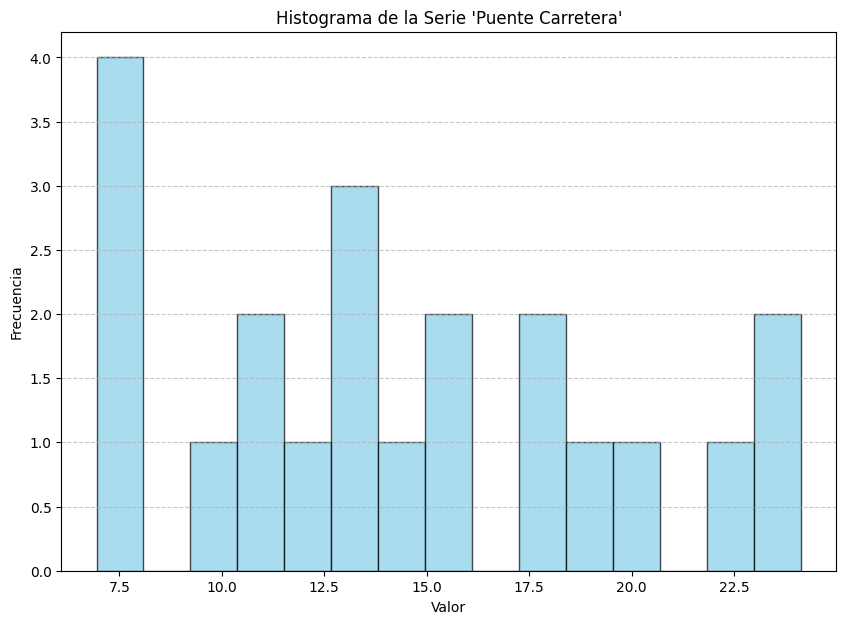

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(merged_df["valor_puente_carretera"], bins=15, color="skyblue", edgecolor="black", alpha=0.7)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Serie 'Puente Carretera'")
plt.grid(axis="y", linestyle="--", alpha=0.7)

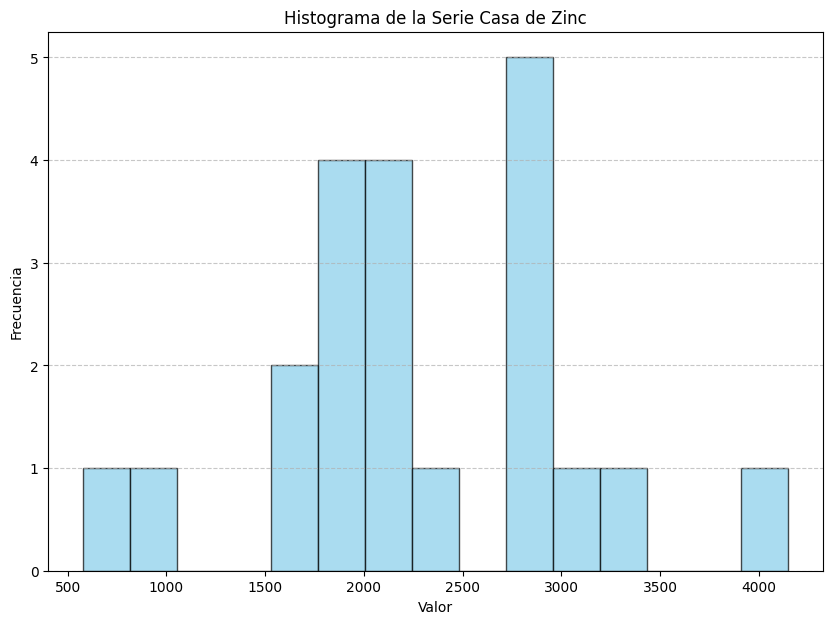

In [15]:
plt.figure(figsize=(10, 7))
plt.hist(merged_df["valor_casa_de_zinc"], bins=15, color="skyblue", edgecolor="black", alpha=0.7)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Serie Casa de Zinc")
plt.grid(axis="y", linestyle="--", alpha=0.7)

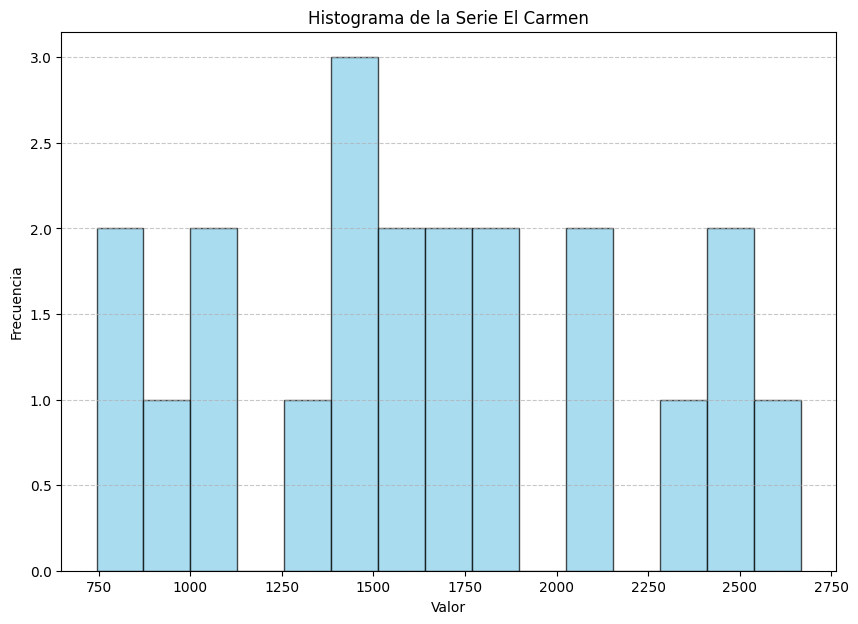

In [16]:
plt.figure(figsize=(10, 7))
plt.hist(merged_df["valor_el_carmen"], bins=15, color="skyblue", edgecolor="black", alpha=0.7)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Serie El Carmen")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Cálculo de estadísticas descriptivas

               Métrica      Valor
0             Promedio  14.371691
1              Mediana  13.450436
2  Desviación Estándar   5.440332
3               Máximo  24.137525
4               Mínimo   6.939096


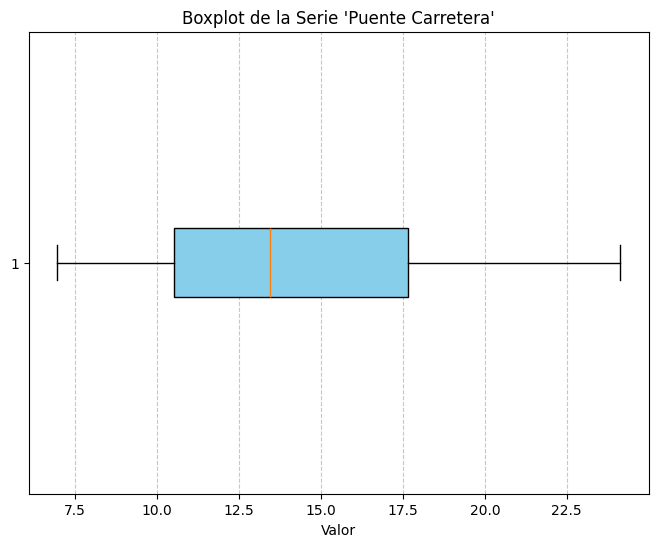

In [23]:

stats_puente_carretera = merged_df["valor_puente_carretera"].describe()

promedio = stats_puente_carretera["mean"]
mediana = merged_df["valor_puente_carretera"].median()
desviacion_std = stats_puente_carretera["std"]
maximo = stats_puente_carretera["max"]
minimo = stats_puente_carretera["min"]

stats_df = pd.DataFrame({
    "Métrica": ["Promedio", "Mediana", "Desviación Estándar", "Máximo", "Mínimo"],
    "Valor": [promedio, mediana, desviacion_std, maximo, minimo]
})

print(stats_df)


plt.figure(figsize=(8, 6))
plt.boxplot(merged_df["valor_puente_carretera"].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))

plt.xlabel("Valor")
plt.title("Boxplot de la Serie 'Puente Carretera'")
plt.grid(axis="x", linestyle="--", alpha=0.7)


               Métrica        Valor
0             Promedio  2295.619048
1              Mediana  2133.100000
2  Desviación Estándar   812.015856
3               Máximo  4148.000000
4               Mínimo   579.200000


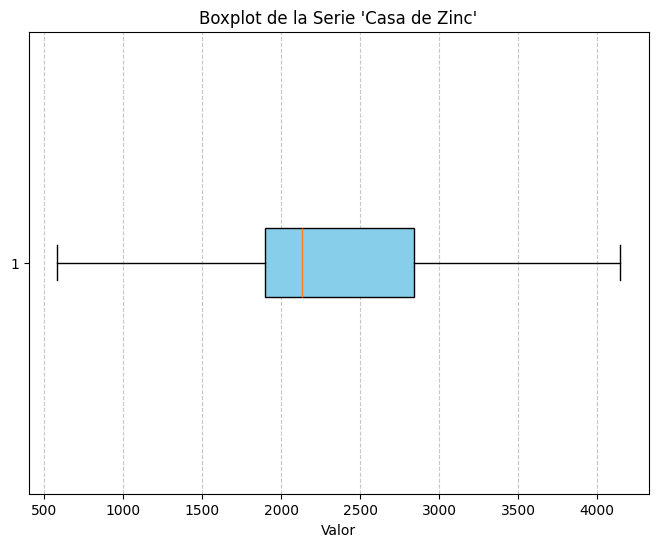

In [25]:
stats_casa_zinc = merged_df["valor_casa_de_zinc"].describe()

promedio = stats_casa_zinc["mean"]
mediana = merged_df["valor_casa_de_zinc"].median()
desviacion_std = stats_casa_zinc["std"]
maximo = stats_casa_zinc["max"]
minimo = stats_casa_zinc["min"]

stats_df = pd.DataFrame({
    "Métrica": ["Promedio", "Mediana", "Desviación Estándar", "Máximo", "Mínimo"],
    "Valor": [promedio, mediana, desviacion_std, maximo, minimo]
})

print(stats_df)


plt.figure(figsize=(8, 6))
plt.boxplot(merged_df["valor_casa_de_zinc"].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))

plt.xlabel("Valor")
plt.title("Boxplot de la Serie 'Casa de Zinc'")
plt.grid(axis="x", linestyle="--", alpha=0.7)

               Métrica        Valor
0             Promedio  1650.733333
1              Mediana  1627.000000
2  Desviación Estándar   553.260038
3               Máximo  2667.000000
4               Mínimo   744.000000


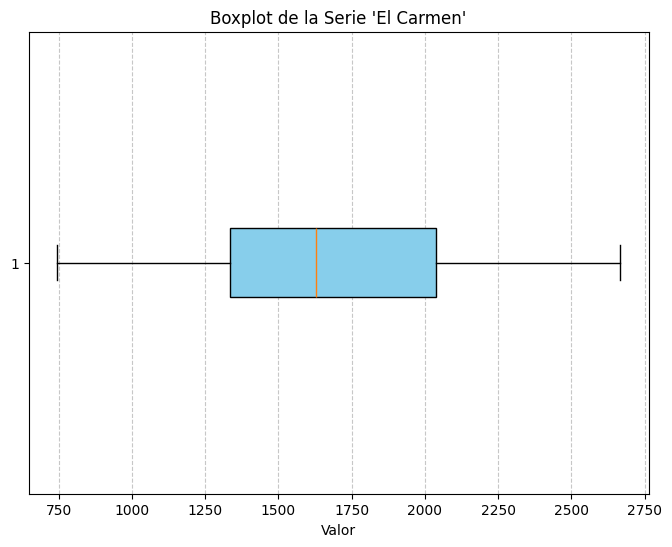

In [26]:
stats_el_carmen = merged_df["valor_el_carmen"].describe()

promedio = stats_el_carmen["mean"]
mediana = merged_df["valor_el_carmen"].median()
desviacion_std = stats_el_carmen["std"]
maximo = stats_el_carmen["max"]
minimo = stats_el_carmen["min"]

stats_df = pd.DataFrame({
    "Métrica": ["Promedio", "Mediana", "Desviación Estándar", "Máximo", "Mínimo"],
    "Valor": [promedio, mediana, desviacion_std, maximo, minimo]
})

print(stats_df)


plt.figure(figsize=(8, 6))
plt.boxplot(merged_df["valor_el_carmen"].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))

plt.xlabel("Valor")
plt.title("Boxplot de la Serie 'El Carmen'")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Documentación del Análisis

Las series climatológicas analizadas corresponden a las estaciones de Casa de Zinc, El Carmen y Puente Carretera. Cada una de estas series presenta valores numéricos asociados con mediciones climáticas, donde Casa de Zinc y El Carmen están expresadas en milímetros (mm), y se trata de datos de precipitación, mientras que Puente Carretera está expresada en metros cúbicos por segundo (m³/s), indicando que se refiere a un caudal fluvial. El periodo de registros comprende desde 1990 hasta 2010, con mediciones anuales que permiten analizar tendencias y fluctuaciones en los valores observados.


En los gráficos generados se identifican diferentes comportamientos en cada serie. Casa de Zinc muestra una gran variabilidad en los valores, con cambios bruscos de un año a otro, lo que indica un comportamiento climático extremo. En contraste, la serie de El Carmen muestra una variabilidad más moderada, que podría estar relacionada con variaciones meteorológicas específicas. Por otro lado, Puente Carretera tiene una distribución más uniforme, aunque se evidencian huecos en la serie temporal, lo que indica la ausencia de registros en ciertos periodos.

En términos de estadística descriptiva, Casa de Zinc presenta un promedio de 2295.6 mm, con una mediana de 2133.1 mm y una desviación estándar de 812.0 mm, lo que confirma su alta variabilidad. Sus valores oscilan entre un mínimo de 579.2 mm y un máximo de 4148.0 mm, lo que indica la presencia de extremos significativos. La serie de El Carmen, con un promedio de 1650.7 mm y una mediana de 1627.0 mm, tiene una desviación estándar de 553.3 mm, mostrando una menor dispersión en comparación con Casa de Zinc. Sus valores varían entre 744.0 mm y 2667.0 mm, lo que sugiere que, aunque hay fluctuaciones, estas son menos abruptas. En el caso de Puente Carretera, el promedio es de 14.37 m³/s y la mediana de 13.45 m³/s, con una desviación estándar de 5.44 m³/s. Sus valores se encuentran entre 6.93 m³/s y 24.14 m³/s, lo que indica que la variabilidad es menor en comparación con las otras dos.



El análisis de los datos sugiere que la serie de Casa de Zinc podría estar influenciada por eventos climáticos extremos. En el caso de El Carmen, aunque la variabilidad es menor, la presencia de valores relativamente dispersos sugiere cambios estacionales específicos que deben ser considerados en el análisis hidrometeorológico de la cuenca. Puente Carretera, a pesar de tener menor variabilidad, presenta huecos en la serie. En general, las estadísticas descriptivas muestran diferencias significativas entre las series, lo que indica que cada estación tiene características propias.